In [1]:
from pyrpl import Pyrpl
from pyrpl.async_utils import sleep

import numpy as np
from scipy.signal import find_peaks

import matplotlib.pyplot as plt

In [2]:
class Laser:
    def __init__(self):
        self.transmission = None
        self.peaks = None

In [3]:
p = Pyrpl(config="scanning-cavity-lock")
r = p.rp

INFO:pyrpl:All your PyRPL settings will be saved to the config file
    C:\Users\Circular\pyrpl_user_dir\config\scanning-cavity-lock.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe scanning-cavity-lock" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('scanning-cavity-lock')
in a python terminal.
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname 10.0.5.11.


In [4]:
DRIVE_FREQUENCY = 1e3

In [5]:
r.scope.input1 = 'in2'
r.scope.input2 = 'in1'

r.scope.trigger_source = 'ch1_positive_edge'
r.scope.trigger_delay = 0
r.scope.threshold = 0.1
r.scope.hysteresis = 0.01

r.scope.duration = 2/DRIVE_FREQUENCY
r.scope.trace_average = 1000

INFO:pyrpl.modules:Calling setup() for scope.trigger_source ...


In [6]:
trace = r.scope.curve_async()

r.asg0.setup(frequency=DRIVE_FREQUENCY, amplitude=0.5, offset=0.5, waveform='sin', trigger_source='immediately', output_direct='out1')
sleep(0.01)

control_laser = Laser()
target_lasers = [Laser()]

control_laser.transmission, target_lasers[0].transmission = trace.result()

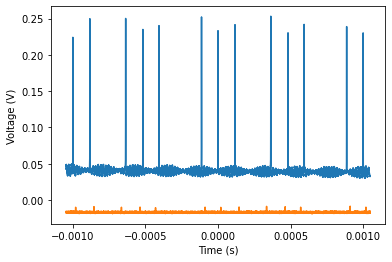

In [7]:
for laser in [control_laser] + target_lasers:    
    plt.plot(r.scope.times, laser.transmission)

plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

plt.show()

In [13]:
control_laser.peaks, _ = find_peaks(control_laser.transmission, height=0.2)
target_lasers[0].peaks, _ = find_peaks(target_lasers[0].transmission, height=-0.011)

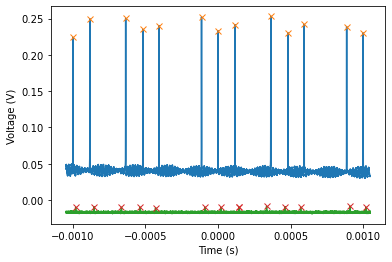

In [16]:
for laser in [control_laser] + target_lasers:   
    plt.plot(r.scope.times, laser.transmission)
    plt.plot(r.scope.times[laser.peaks], laser.transmission[laser.peaks], 'x')

plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

plt.show()

In [17]:
for index, (control_peak, target_peak) in enumerate(zip(control_laser.peaks, target_lasers[0].peaks)):
    delta =  r.scope.times[control_peak] - r.scope.times[target_peak]
    print(f"Peak #{index} Control: {r.scope.times[control_peak]*1e3:.3f} ms, Target: {r.scope.times[target_peak]*1e3:.3f} ms, Delta: {delta*1e3:.3f} ms.")

Peak #0 Control: -1.000 ms, Target: -0.981 ms, Delta: -0.019 ms.
Peak #1 Control: -0.883 ms, Target: -0.854 ms, Delta: -0.028 ms.
Peak #2 Control: -0.636 ms, Target: -0.665 ms, Delta: 0.029 ms.
Peak #3 Control: -0.518 ms, Target: -0.537 ms, Delta: 0.019 ms.
Peak #4 Control: -0.406 ms, Target: -0.430 ms, Delta: 0.024 ms.
Peak #5 Control: -0.113 ms, Target: -0.089 ms, Delta: -0.024 ms.
Peak #6 Control: 0.000 ms, Target: 0.019 ms, Delta: -0.019 ms.
Peak #7 Control: 0.117 ms, Target: 0.145 ms, Delta: -0.028 ms.
Peak #8 Control: 0.364 ms, Target: 0.145 ms, Delta: 0.218 ms.
Peak #9 Control: 0.483 ms, Target: 0.335 ms, Delta: 0.148 ms.
Peak #10 Control: 0.594 ms, Target: 0.463 ms, Delta: 0.131 ms.
Peak #11 Control: 0.887 ms, Target: 0.570 ms, Delta: 0.317 ms.
Peak #12 Control: 1.000 ms, Target: 0.911 ms, Delta: 0.089 ms.
